In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.centrality as centrality

In [2]:
G = nx.Graph()
nodes = [1,2,3,4,5,6,7]
edges = [(1,2), (1,3),(2,3),(3,4),(3,5),(4,5),(2,4),(2,5),(5,6),(6,7)]
for node in nodes:
    G.add_node(node)
for edge in edges:
    G.add_edge(edge[0],edge[1])

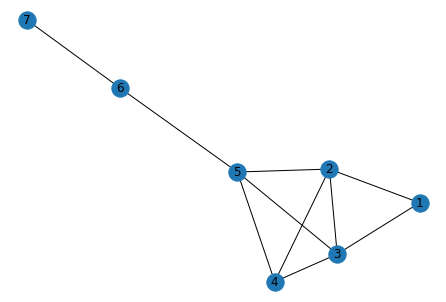

In [3]:
nx.draw(G, with_labels=True)

In [4]:
nx.clustering(G)

{1: 1.0,
 2: 0.6666666666666666,
 3: 0.6666666666666666,
 4: 1.0,
 5: 0.5,
 6: 0,
 7: 0}

In [10]:
x = nx.algorithms.shortest_paths.generic.shortest_path_length(G)

In [12]:
list(x)

[(1, {1: 0, 2: 1, 3: 1, 4: 2, 5: 2, 6: 3, 7: 4}),
 (2, {2: 0, 1: 1, 3: 1, 4: 1, 5: 1, 6: 2, 7: 3}),
 (3, {3: 0, 1: 1, 2: 1, 4: 1, 5: 1, 6: 2, 7: 3}),
 (4, {4: 0, 3: 1, 5: 1, 2: 1, 1: 2, 6: 2, 7: 3}),
 (5, {5: 0, 3: 1, 4: 1, 2: 1, 6: 1, 1: 2, 7: 2}),
 (6, {6: 0, 5: 1, 7: 1, 3: 2, 4: 2, 2: 2, 1: 3}),
 (7, {7: 0, 6: 1, 5: 2, 3: 3, 4: 3, 2: 3, 1: 4})]

In [59]:
def loop(episode):
    with open(f'data/starwars-episode-{episode}-interactions-allCharacters.json') as f:
        data = json.load(f)
    nodes = [ node['name'] for node in data["nodes"] ]
    edges = [ (nodes[link['source']], nodes[link['target']]) for link in data["links"] ]
    G = nx.Graph()
    for node in nodes:
        G.add_node(node)
    for edge in edges:
        G.add_edge(edge[0],edge[1])
    plt.figure(figsize=(30,15))
    plt.subplot(121)
    nx.draw(G, with_labels=True)
    return sorted(centrality.betweenness_centrality(G).items(), key = lambda x: x[1])[::-1]

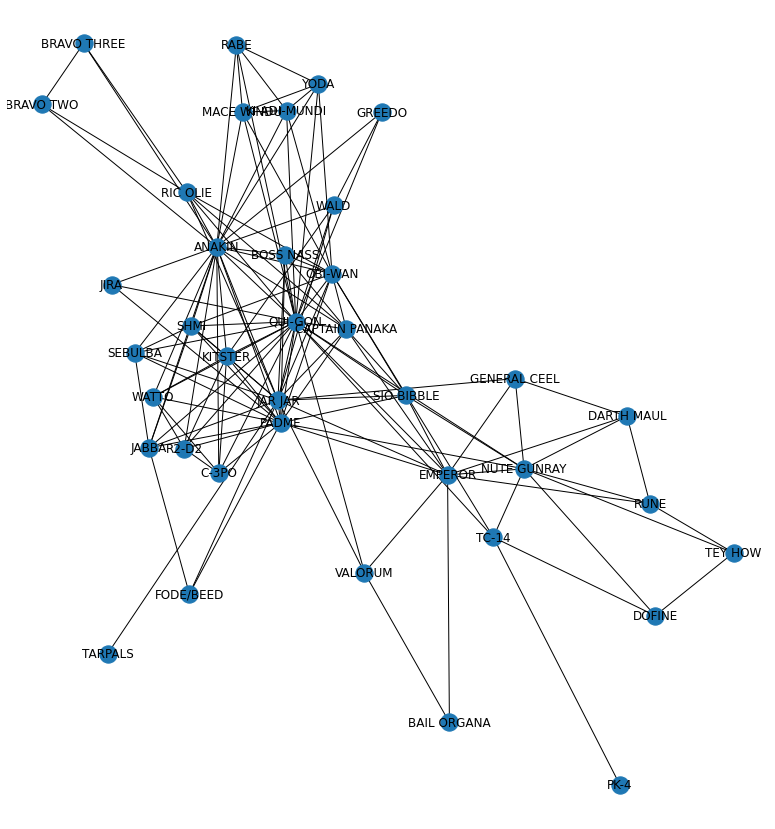

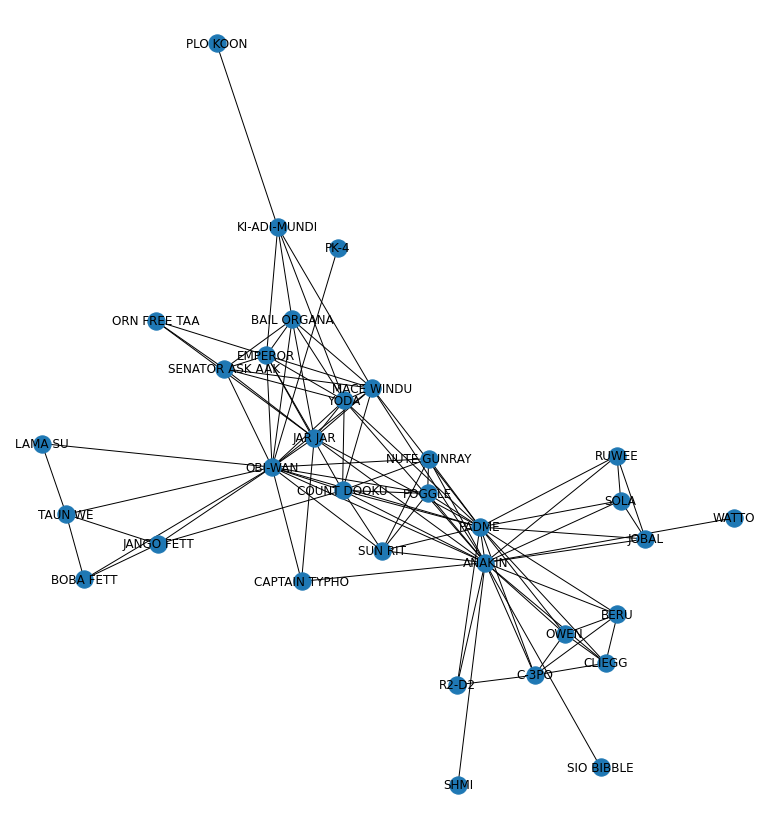

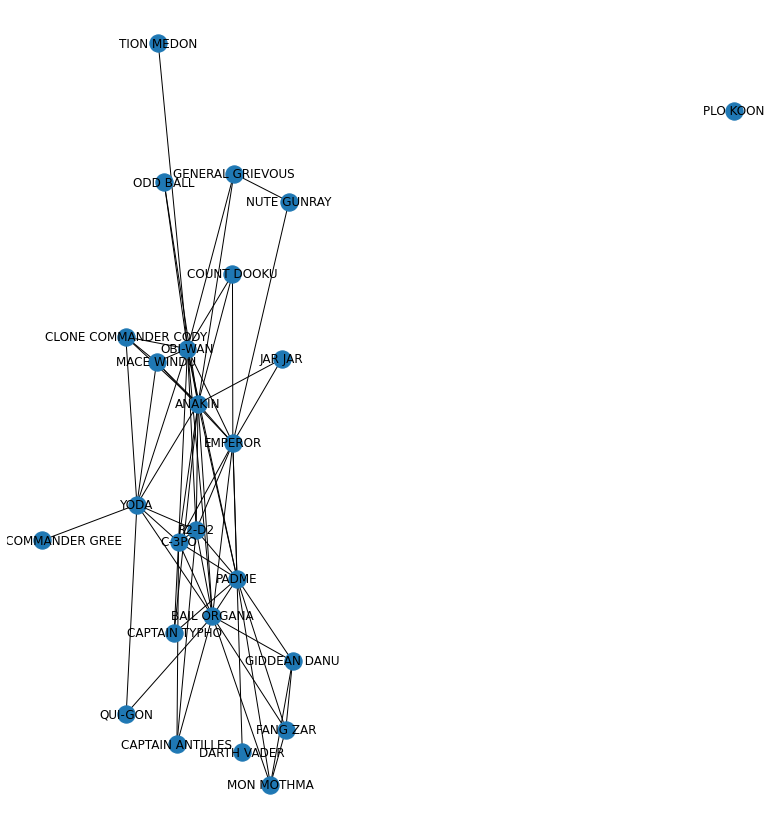

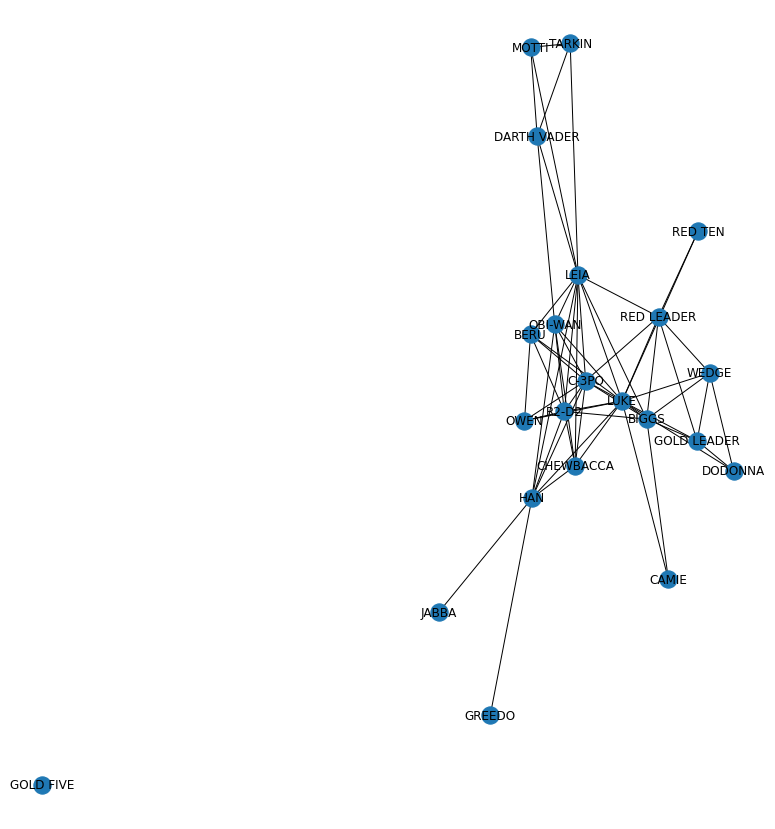

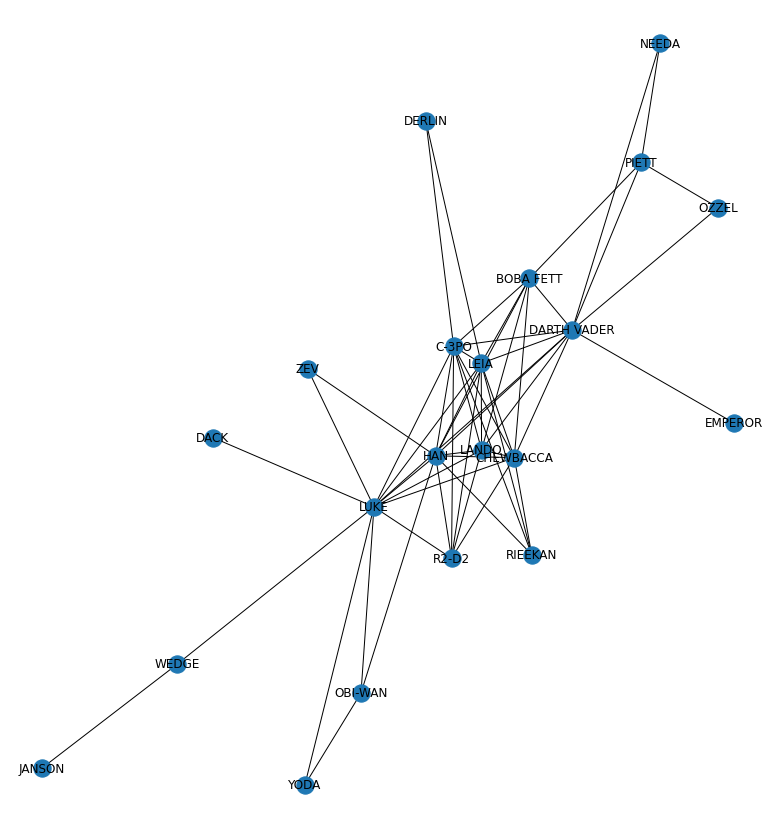

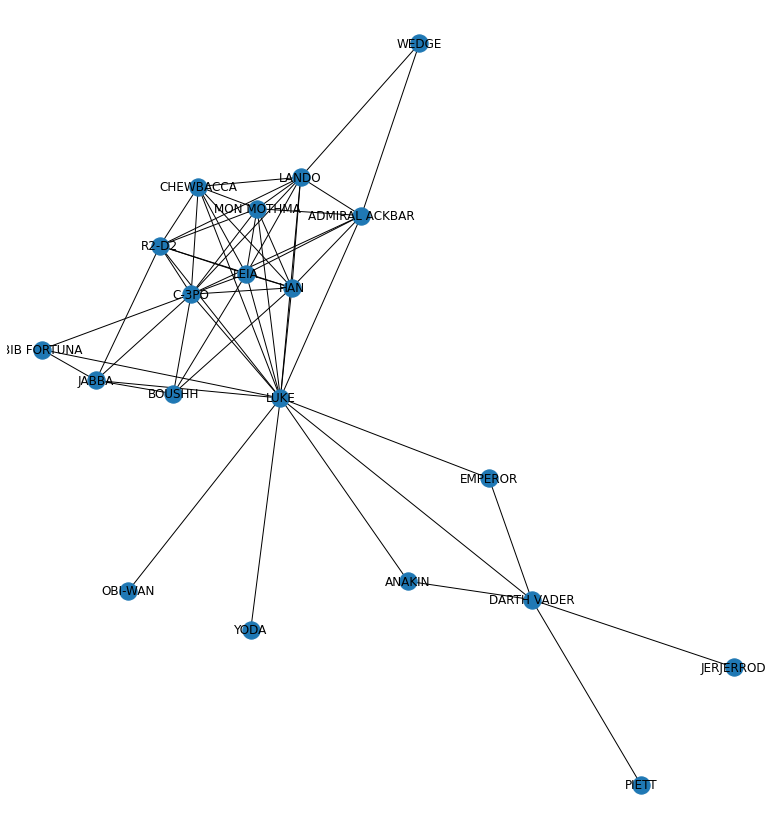

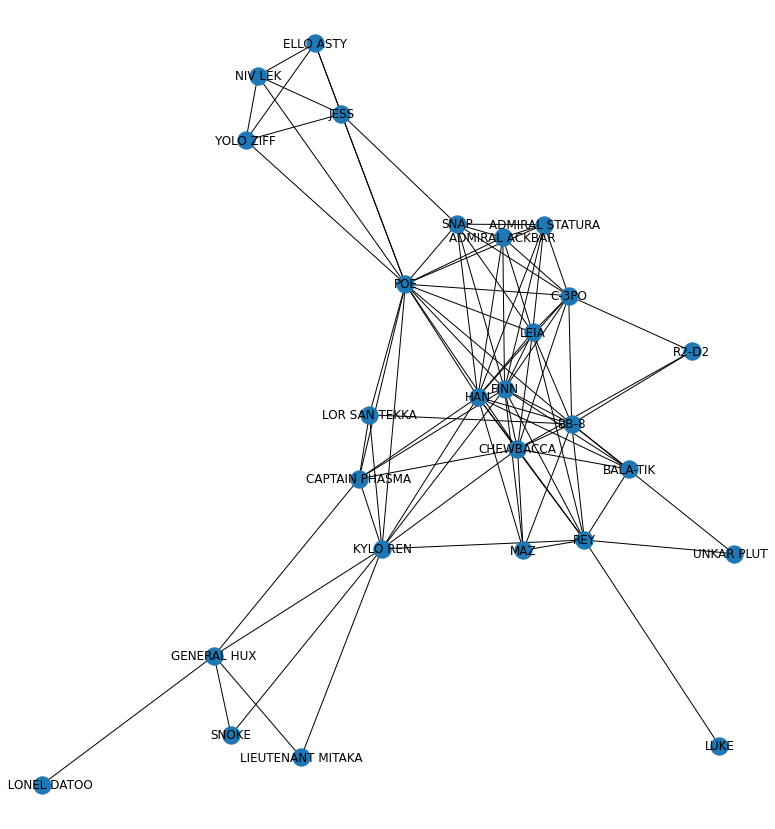

In [61]:
betweenness = []
for i in range(1,8):
    betweenness.append(loop(i))

In [63]:
for characters in betweenness:
    print(characters[:5])

[('QUI-GON', 0.3226135226135226), ('ANAKIN', 0.16988362821696157), ('JAR JAR', 0.14583615000281666), ('NUTE GUNRAY', 0.1254313837647171), ('PADME', 0.10342138675472008)]
[('ANAKIN', 0.3833822091886608), ('OBI-WAN', 0.31480109272447976), ('PADME', 0.1789467253176931), ('KI-ADI-MUNDI', 0.0625), ('JAR JAR', 0.06213037634408606)]
[('OBI-WAN', 0.18631815044858524), ('ANAKIN', 0.1847481021394065), ('EMPEROR', 0.18323844030365768), ('BAIL ORGANA', 0.1818754313319531), ('YODA', 0.11592477570738441)]
[('LUKE', 0.3223922902494331), ('LEIA', 0.2304988662131519), ('HAN', 0.1761904761904762), ('BIGGS', 0.041666666666666664), ('C-3PO', 0.04064625850340136)]
[('LUKE', 0.41621781727044893), ('DARTH VADER', 0.3246753246753247), ('HAN', 0.11175894281157435), ('WEDGE', 0.09999999999999999), ('C-3PO', 0.07398951925267716)]
[('LUKE', 0.5968810916179338), ('DARTH VADER', 0.20760233918128654), ('C-3PO', 0.06423001949317739), ('LANDO', 0.058089668615984406), ('ADMIRAL ACKBAR', 0.04327485380116959)]
[('POE', 0

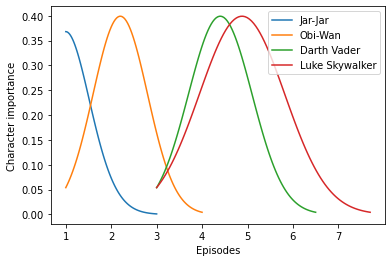

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from numpy import *
def f(t):
    return t**2*exp(-t**2)

t = linspace(1, 3, 100)    # 51 points between 0 and 3
y = ones(len(t))         # allocate y with float elements
for i in range(len(t)):
    y[i] = f(t[i])

plt.plot(t, y, label = "Jar-Jar")

mu = 0
variance = 1
sigma = math.sqrt(variance)
q = np.linspace(mu + sigma, mu + 4*sigma, 100) #obi wan
plt.plot(q, stats.norm.pdf(x, mu, sigma), label ="Obi-Wan")
w = np.linspace(mu + 3*sigma, mu + 6.5*sigma, 100) #darth vader
plt.plot(w, stats.norm.pdf(x, mu, sigma), label = "Darth Vader")
a = np.linspace(mu + 3*sigma, mu + 7.7*sigma, 100) #luke
plt.plot(a, stats.norm.pdf(x, mu, sigma), label = "Luke Skywalker")
plt.xlabel("Episodes")
plt.ylabel("Character importance")
plt.xticks([1,2,3,4,5,6,7])
plt.legend(loc="upper right")
plt.show()

In [254]:
def ws(n, k, p, seed=None):
    """Returns a Watts–Strogatz small-world graph.

    Parameters
    ----------
    n : int
        The number of nodes
    k : int
        Each node is joined with its `k` nearest neighbors in a ring
        topology.
    p : float
        The probability of rewiring each edge
    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    See Also
    --------
    newman_watts_strogatz_graph()
    connected_watts_strogatz_graph()

    Notes
    -----
    First create a ring over $n$ nodes [1]_.  Then each node in the ring is joined
    to its $k$ nearest neighbors (or $k - 1$ neighbors if $k$ is odd).
    Then shortcuts are created by replacing some edges as follows: for each
    edge $(u, v)$ in the underlying "$n$-ring with $k$ nearest neighbors"
    with probability $p$ replace it with a new edge $(u, w)$ with uniformly
    random choice of existing node $w$.

    In contrast with :func:`newman_watts_strogatz_graph`, the random rewiring
    does not increase the number of edges. The rewired graph is not guaranteed
    to be connected as in :func:`connected_watts_strogatz_graph`.

    References
    ----------
    .. [1] Duncan J. Watts and Steven H. Strogatz,
       Collective dynamics of small-world networks,
       Nature, 393, pp. 440--442, 1998.
    """
    if k > n:
        raise nx.NetworkXError("k>n, choose smaller k or larger n")

    # If k == n, the graph is complete not Watts-Strogatz
    if k == n:
        return nx.complete_graph(n)

    G = nx.Graph()
    nodes = list(range(n))  # nodes are labeled 0 to n-1
    # connect each node to k/2 neighbors
    for j in range(1, k // 2 + 1):
        targets = nodes[j:] + nodes[0:j]  # first j nodes are now last in list
        G.add_edges_from(zip(nodes, targets))
    # rewire edges from each node
    # loop over all nodes in order (label) and neighbors in order (distance)
    # no self loops or multiple edges allowed
    
    for j in range(1, k // 2 + 1):  # outer loop is neighbors
        print(j)
        plt.figure(figsize=(30,15))
        plt.subplot(121)
        nx.draw(G, with_labels=True)
        print(nx.average_shortest_path_length(G))
        targets = nodes[j:] + nodes[0:j]  # first j nodes are now last in list
        # inner loop in node order
        for u, v in zip(nodes, targets):
            if random.randint(25,100) < p:
                w = random.randint(1,n)
                # Enforce no self-loops or multiple edges
                while w == u or G.has_edge(u, w):
                    w = random.randint(1,n)
                    if G.degree(u) >= n - 1:
                        break  # skip this rewiring
                else:
                    G.remove_edge(u, v)
                    G.add_edge(u, w)
    return G

In [255]:
import random


1
2.235294117647059
2
2.048739495798319
3
1.9619047619047618
4
1.8857142857142857
5
1.826984126984127


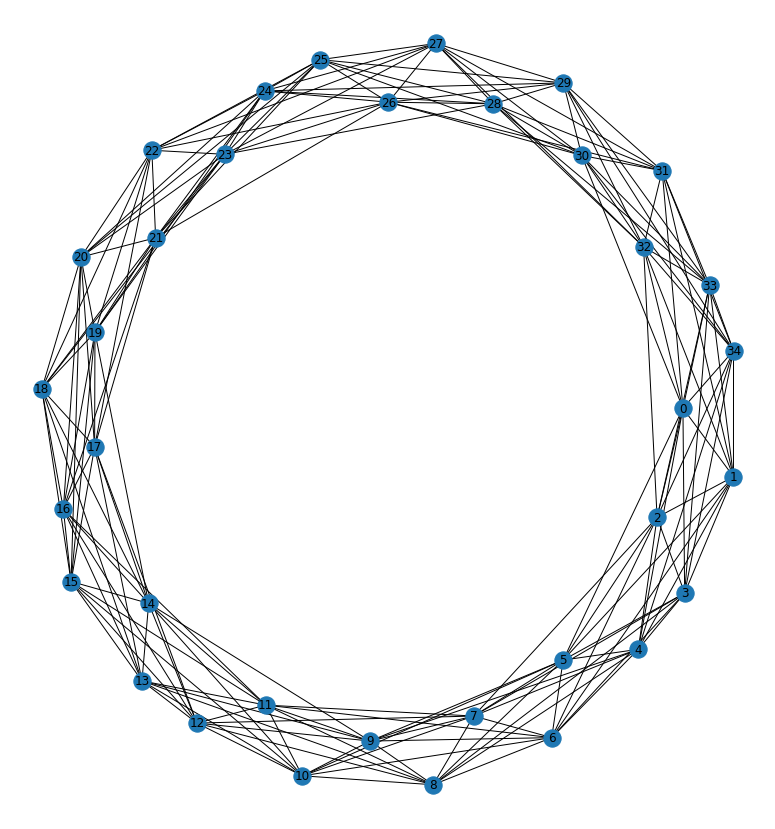

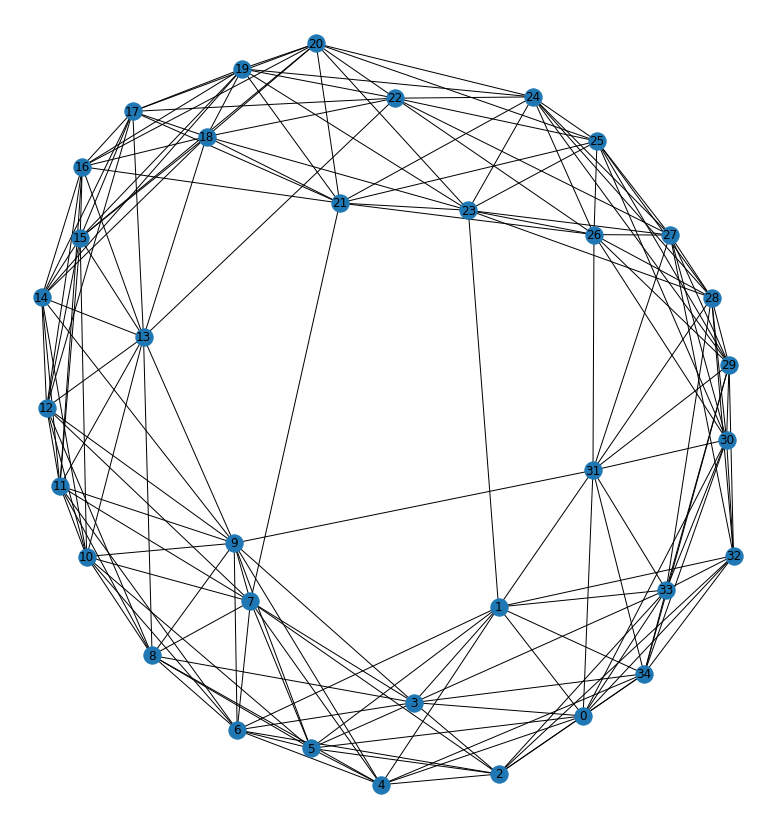

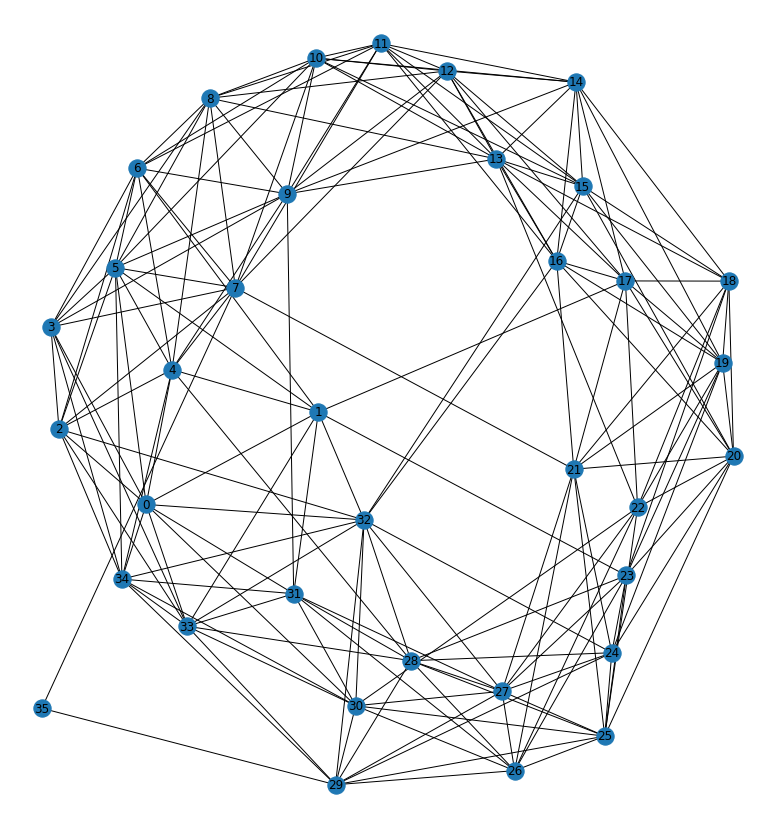

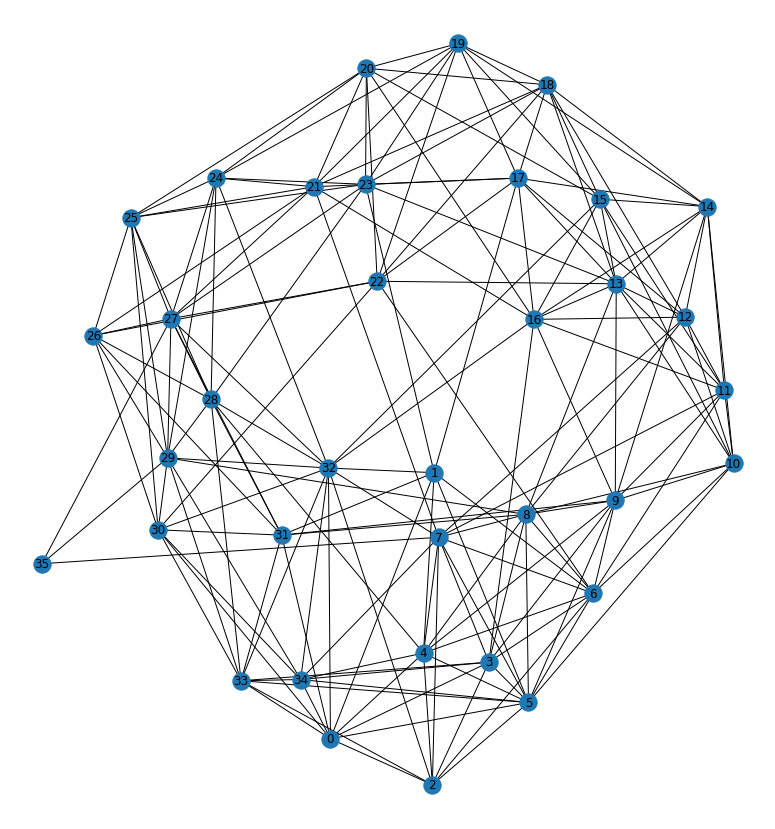

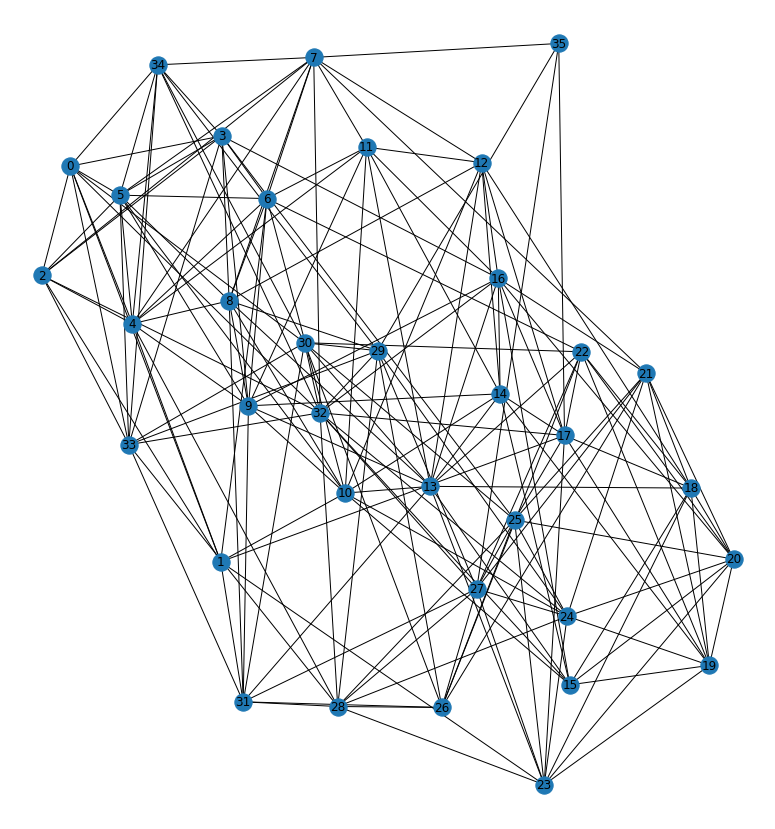

In [256]:
m = []
x = ws(35,10,45, 100)

1
2
3


AttributeError: 'list' object has no attribute 'edges'

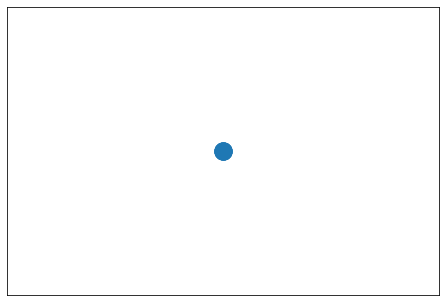

In [230]:
x= nx.draw(ws(20,7,50, 100), with_labels=True)

In [227]:
x

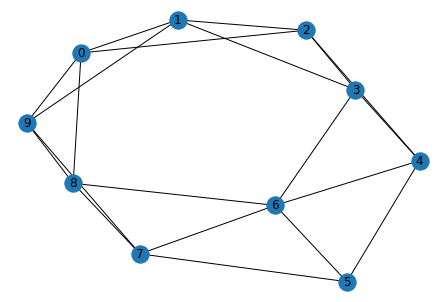

In [228]:
nx.draw(x[0], with_labels=True)

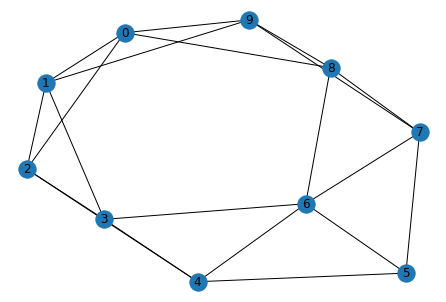

In [229]:
nx.draw(x[1], with_labels=True)